In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro,kstest,normaltest
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import pickle
import json

# Problem Statement

# Data Gathering

In [2]:
df = pd.read_csv("Sales_data.csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Exploratory Data Analysis and Feature Enginnering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Item_Identifier

In [6]:
df["Item_Identifier"].value_counts()

FDG33    10
FDW13    10
FDW49     9
FDP25     9
FDU12     9
         ..
DRF48     1
FDC23     1
FDN52     1
FDO33     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [7]:
df.drop("Item_Identifier",axis = 1,inplace = True)

In [8]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


### Item_Weight

In [10]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [11]:
df["Item_Weight"].fillna(df["Item_Weight"].median(),inplace = True)

In [12]:
df["Item_Weight"].isna().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


### Item_Fat_Content

In [14]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df["Item_Fat_Content"].replace({"reg" : 0, "Regular" : 0, "low fat" : 1, "LF" : 1 , "Low Fat" : 1},inplace = True)

In [16]:
Item_Fat_Content_Values = {"reg" : 0, "Regular" : 0, "low fat" : 1, "LF" : 1 , "Low Fat" : 1}

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 732.6+ KB


### Item_Type

In [18]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [19]:
df = pd.get_dummies(df,columns = ["Item_Type"])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   object 
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Size                      6113 non-null   object 
 7   Outlet_Location_Type             8523 non-null   object 
 8   Outlet_Type                      8523 non-null   object 
 9   Item_Outlet_Sales                8523 non-null   float64
 10  Item_Type_Baking Goods           8523 non-null   uint8  
 11  Item_Type_Breads                 8523 non-null   uint8  
 12  Item_Type_Breakfast 

### Outlet_Identifier

In [21]:
df["Outlet_Identifier"].value_counts().sort_index()

OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Outlet_Identifier, dtype: int64

In [22]:
df["Outlet_Identifier"].replace({"OUT010" : 10,"OUT013" : 13, "OUT017" : 17, "OUT018" : 18, "OUT019" : 19, "OUT027" : 27, "OUT035" : 35, "OUT045" : 45, "OUT046" : 46, "OUT049" : 49},inplace = True)

In [23]:
Outlet_Identifier_Values = {"OUT010" : 10,"OUT013" : 13, "OUT017" : 17, "OUT018" : 18, "OUT019" : 19, "OUT027" : 27, "OUT035" : 35, "OUT045" : 45, "OUT046" : 46, "OUT049" : 49}

In [24]:
df["Outlet_Identifier"].value_counts()

27    935
13    932
46    930
35    930
49    930
45    929
18    928
17    926
10    555
19    528
Name: Outlet_Identifier, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   int64  
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Size                      6113 non-null   object 
 7   Outlet_Location_Type             8523 non-null   object 
 8   Outlet_Type                      8523 non-null   object 
 9   Item_Outlet_Sales                8523 non-null   float64
 10  Item_Type_Baking Goods           8523 non-null   uint8  
 11  Item_Type_Breads                 8523 non-null   uint8  
 12  Item_Type_Breakfast 

### Outlet_Size

In [26]:
    df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [27]:
df["Outlet_Size"].replace ({"Small" : 0, "Medium" : 1, "High" : 2},inplace = True)

In [28]:
Outlet_Size_Values = {"Small" : 0, "Medium" : 1, "High" : 2}

In [29]:
df["Outlet_Size"].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   int64  
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Size                      6113 non-null   float64
 7   Outlet_Location_Type             8523 non-null   object 
 8   Outlet_Type                      8523 non-null   object 
 9   Item_Outlet_Sales                8523 non-null   float64
 10  Item_Type_Baking Goods           8523 non-null   uint8  
 11  Item_Type_Breads                 8523 non-null   uint8  
 12  Item_Type_Breakfast 

In [31]:
df["Outlet_Size"].fillna(df["Outlet_Size"].median(),inplace = True)

In [32]:
df["Outlet_Size"].isna().sum()

0

### Outlet_Location_Type

In [33]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [34]:
df["Outlet_Location_Type"].replace ({"Tier 1" : 2, "Tier 2" : 1, "Tier 3" : 0},inplace = True)

In [35]:
Outlet_Location_Type_Values = {"Tier 1" : 2, "Tier 2" : 1, "Tier 3" : 0}

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   int64  
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Size                      8523 non-null   float64
 7   Outlet_Location_Type             8523 non-null   int64  
 8   Outlet_Type                      8523 non-null   object 
 9   Item_Outlet_Sales                8523 non-null   float64
 10  Item_Type_Baking Goods           8523 non-null   uint8  
 11  Item_Type_Breads                 8523 non-null   uint8  
 12  Item_Type_Breakfast 

### Outlet_Type

In [37]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [38]:
df = pd.get_dummies(df, columns = ["Outlet_Type"])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   int64  
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Size                      8523 non-null   float64
 7   Outlet_Location_Type             8523 non-null   int64  
 8   Item_Outlet_Sales                8523 non-null   float64
 9   Item_Type_Baking Goods           8523 non-null   uint8  
 10  Item_Type_Breads                 8523 non-null   uint8  
 11  Item_Type_Breakfast              8523 non-null   uint8  
 12  Item_Type_Canned    

# Feature Selection

### Linearity

In [40]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000,0.021092,-0.014168,0.024951,-0.005421,0.007739,0.010536,-0.001958,0.009693,-0.032608,...,-0.002226,0.027005,-0.005165,0.010145,-0.046969,0.023419,-0.004778,0.011747,0.004956,-0.017723
Item_Fat_Content,0.021092,1.000000,-0.047314,-0.006063,-0.000477,-0.003151,-0.000622,-0.001598,-0.018719,-0.083804,...,-0.118574,0.104988,-0.012594,-0.059848,0.094875,-0.025945,0.002924,-0.000533,-0.002129,-0.000183
Item_Visibility,-0.014168,-0.047314,1.000000,-0.001315,-0.111788,-0.074834,-0.069309,0.028099,-0.128625,0.016887,...,-0.017087,-0.016240,0.014910,0.005635,-0.009825,0.003688,0.286400,-0.144249,-0.034671,-0.051144
Item_MRP,0.024951,-0.006063,-0.001315,1.000000,0.004061,0.005020,-0.006059,-0.000232,0.567574,-0.067311,...,-0.004086,-0.018595,0.001186,0.033817,-0.035808,0.014613,-0.004277,0.004885,0.003850,-0.006714
Outlet_Identifier,-0.005421,-0.000477,-0.111788,0.004061,1.000000,0.141465,-0.433151,0.692148,0.152660,-0.002812,...,-0.010072,0.003240,0.005859,0.007181,-0.000167,0.000187,-0.403284,0.499966,-0.278820,-0.053152
Outlet_Establishment_Year,0.007739,-0.003151,-0.074834,0.005020,0.141465,1.000000,-0.193389,0.089216,-0.049135,-0.003546,...,-0.013428,-0.002874,-0.001013,0.002650,0.007486,0.011897,-0.281196,0.245070,0.466336,-0.538072
Outlet_Size,0.010536,-0.000622,-0.069309,-0.006059,-0.433151,-0.193389,1.000000,-0.614311,0.086182,-0.002434,...,-0.004846,-0.014201,-0.009207,-0.002811,-0.000861,0.009401,-0.201288,0.010163,0.099476,0.099896
Outlet_Location_Type,-0.001958,-0.001598,0.028099,-0.000232,0.692148,0.089216,-0.614311,1.000000,-0.089367,0.003345,...,-0.003999,0.014576,0.005391,0.001845,0.001446,-0.006957,0.041284,0.472793,-0.381559,-0.383172
Item_Outlet_Sales,0.009693,-0.018719,-0.128625,0.567574,0.152660,-0.049135,0.086182,-0.089367,1.000000,-0.038381,...,-0.002995,-0.021267,0.007380,0.022782,-0.024040,0.015039,-0.411727,0.108765,-0.038059,0.311192
Item_Type_Baking Goods,-0.032608,-0.083804,0.016887,-0.067311,-0.002812,-0.003546,-0.002434,0.003345,-0.038381,1.000000,...,-0.065715,-0.040800,-0.024951,-0.116120,-0.067327,-0.038133,0.003536,0.001846,-0.003632,-0.002957


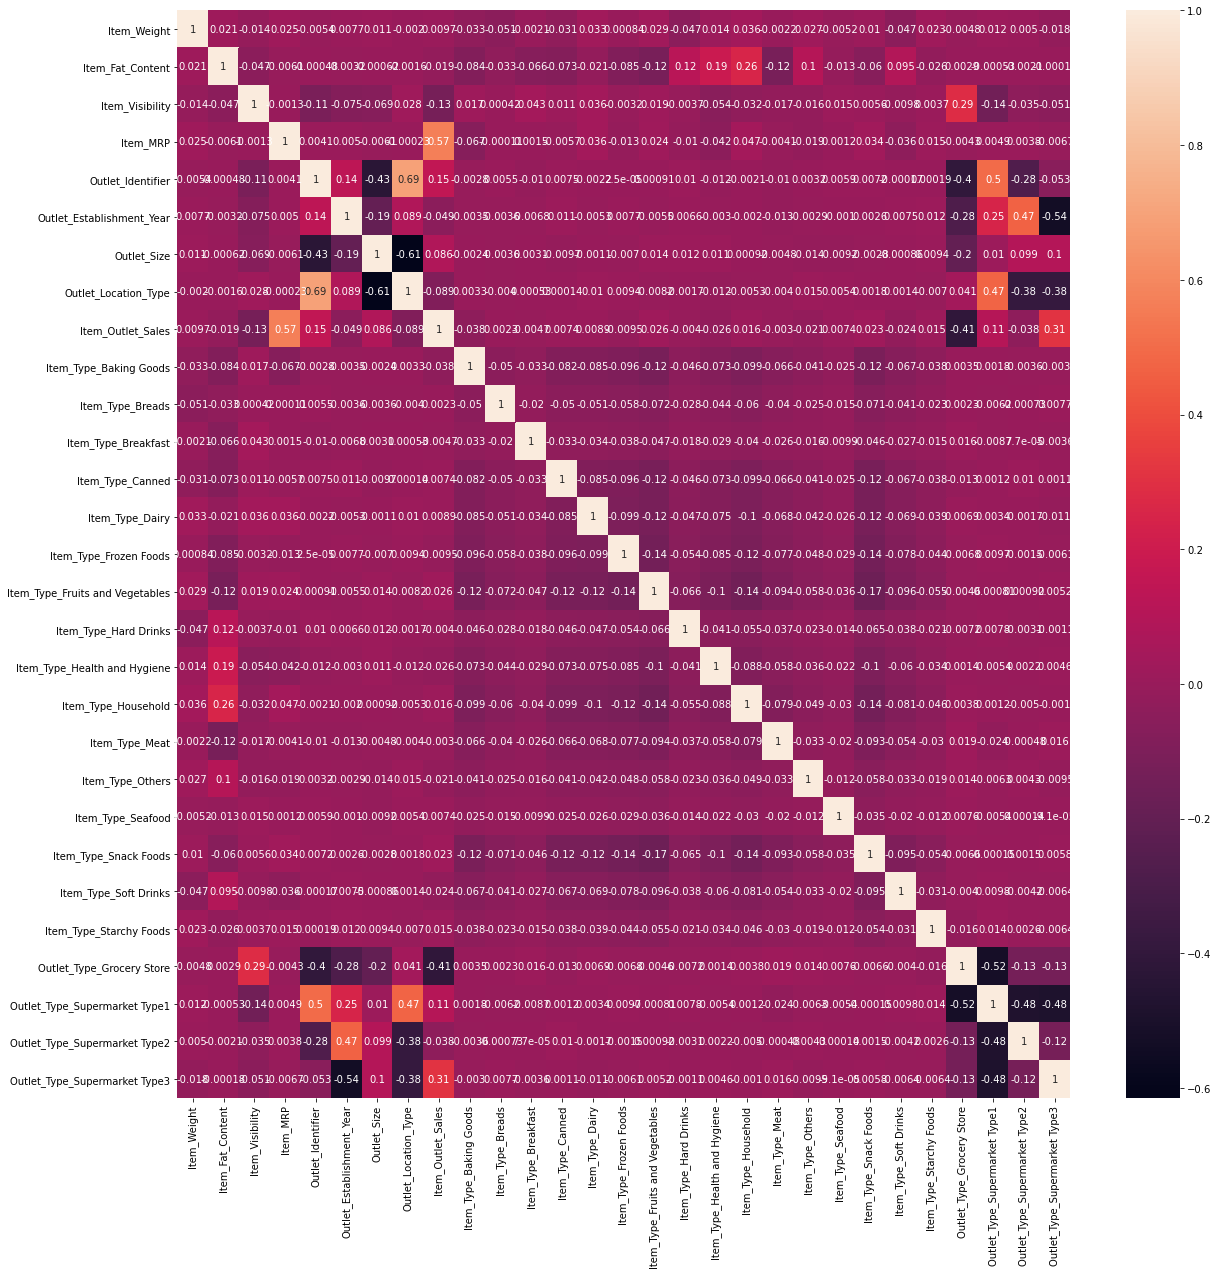

In [41]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

In [42]:
# sns.pairplot(df.corr())

### No Multicolinearity

In [43]:
df1 = df.drop("Item_Outlet_Sales",axis = 1)

Item_Weight                        1.014566
Item_Fat_Content                   1.216414
Item_Visibility                    1.100879
Item_MRP                           1.013300
Outlet_Identifier                  3.426768
Outlet_Establishment_Year          2.743093
Outlet_Size                        2.465658
Outlet_Location_Type               4.810702
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood                       inf
Item_Type_Snack Foods                   inf
Item_Type_Soft Drinks           

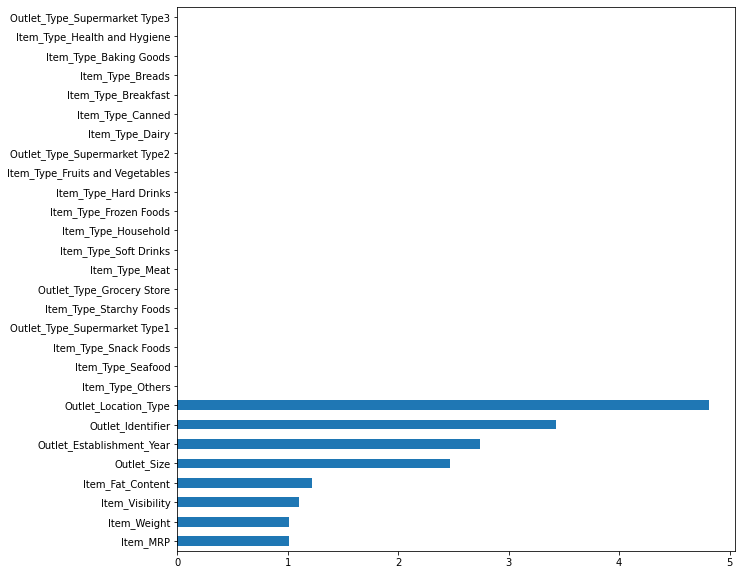

In [44]:
vif_list = []

for i in range (df1.shape[1]) :
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list,index = df1.columns)
print (s1)

plt.figure(figsize = (10,10))
print (s1.sort_values().plot(kind = "barh"))

# Model Training

In [45]:
x = df.drop("Item_Outlet_Sales",axis = 1)
y = df["Item_Outlet_Sales"]

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 1)

In [47]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(6818, 28)
(1705, 28)
(6818,)
(1705,)


In [48]:
model = LinearRegression()

In [49]:
model.fit(x_train,y_train)

LinearRegression()

# Model Evalution

### Training Data

In [50]:
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print ("Mean Squared Error :",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print ("Mean Absolute Error :",mae)

rmse = np.sqrt(mse)
print ("Root Mean Squared Error :",rmse)

r2 = r2_score(y_train,y_pred_train)
print ("R square :",r2)

Mean Squared Error : 1263907.08834339
Mean Absolute Error : 830.4281461426666
Root Mean Squared Error : 1124.2362244401263
R square : 0.5638892402730649


### Testing Data

In [51]:
y_pred_test = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print ("Mean Squared Error :",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print ("Mean Absolute Error :",mae)

rmse = np.sqrt(mse)
print ("Root Mean Squared Error :",rmse)

r2 = r2_score(y_test,y_pred_test)
print ("R square :",r2)

Mean Squared Error : 1311572.7825962324
Mean Absolute Error : 855.6379506061099
Root Mean Squared Error : 1145.2391813923555
R square : 0.5575465818396317


# Normality of residual

### kdeplot

In [52]:
residual = y_train - y_pred_train

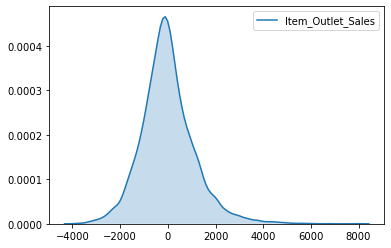

In [53]:
sns.kdeplot(residual,shade = True)

### Hypothesis Testing

In [54]:
# shapiro test
_,p_value = shapiro(residual)
print (p_value)

if p_value >= 0.05 :
    print ("Null hypothesis accepted")
    print ("Data is Normally Distributed")
else :
    print ("Alternate hypothesis accepted")
    print ("Data is not Normally Distributed")

3.519527948562522e-36
Alternate hypothesis accepted
Data is not Normally Distributed


In [55]:
# ks test
_,p_value = kstest(residual, "norm")
print (p_value)

if p_value >= 0.05 :
    print ("Null hypothesis accepted")
    print ("Data is Normally Distributed")
else :
    print ("Alternate hypothesis accepted")
    print ("Data is not Normally Distributed")

0.0
Alternate hypothesis accepted
Data is not Normally Distributed


In [56]:
# normal test
_,p_value = normaltest(residual)
print (p_value)

if p_value >= 0.05 :
    print ("Null hypothesis accepted")
    print ("Data is Normally Distributed")
else :
    print ("Alternate hypothesis accepted")
    print ("Data is not Normally Distributed")

3.022373506494035e-185
Alternate hypothesis accepted
Data is not Normally Distributed


### QQ Plot

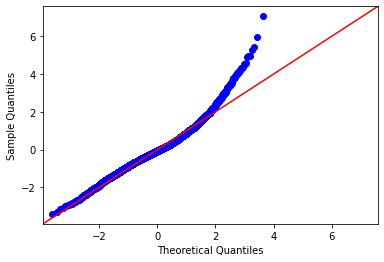

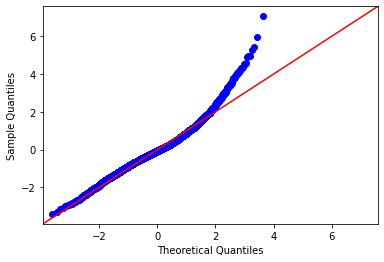

In [57]:
sm.qqplot(residual,line = "45",fit = True)

### skewness

In [58]:
skew = residual.skew()
print ("Skewness :",skew)

Skewness : 0.7156672736240705


# Homoscadasticity

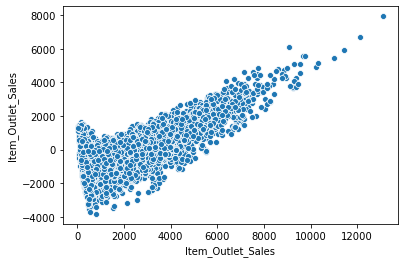

In [59]:
sns.scatterplot (x = y_train , y = residual)

## Find Outlier By Boxplot and IQR Method

In [60]:
b = df.columns
print (b)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')


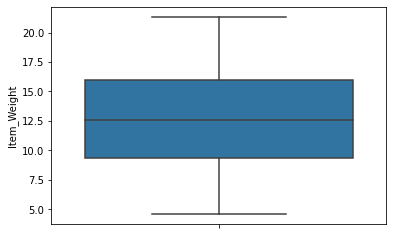

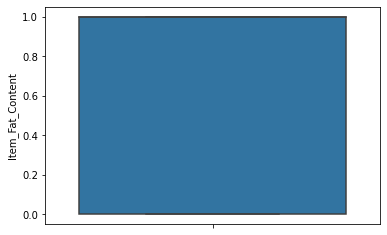

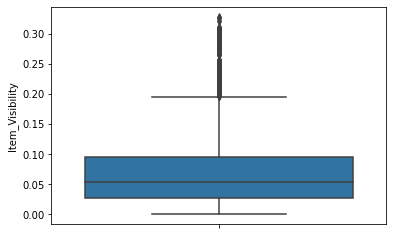

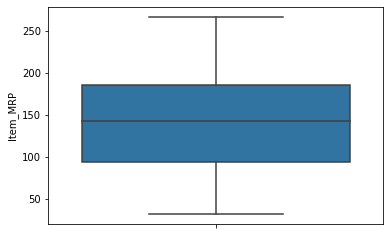

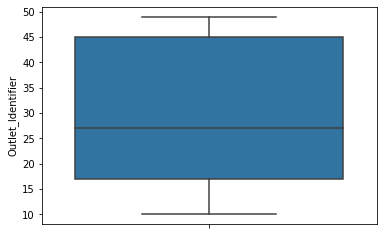

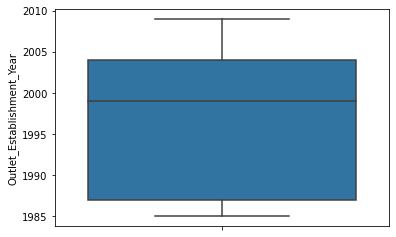

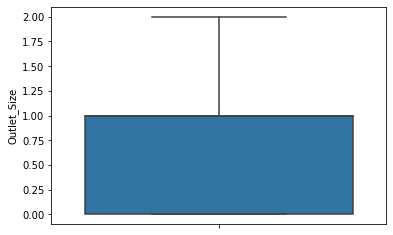

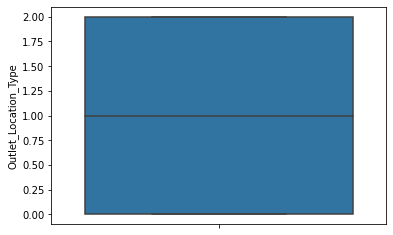

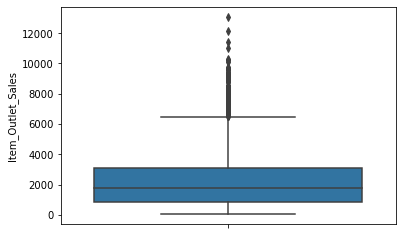

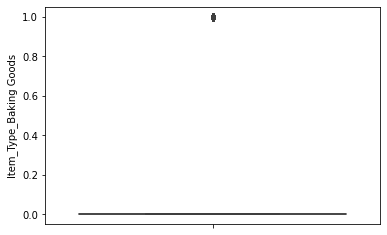

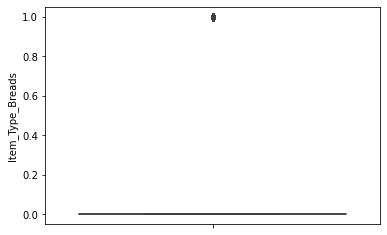

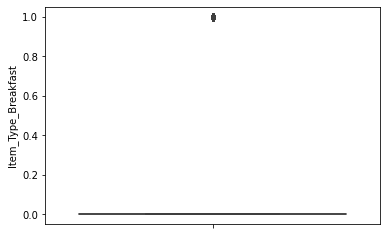

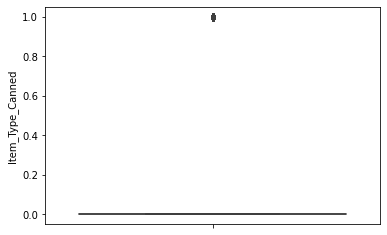

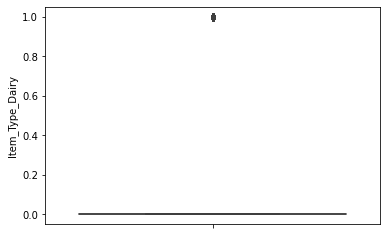

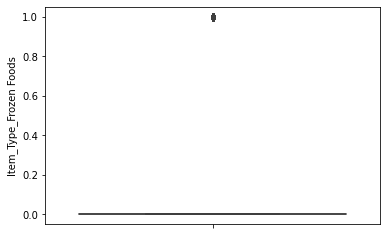

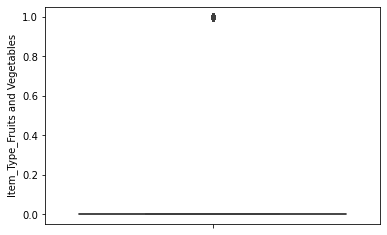

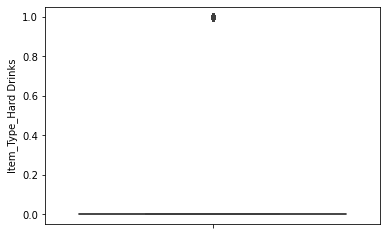

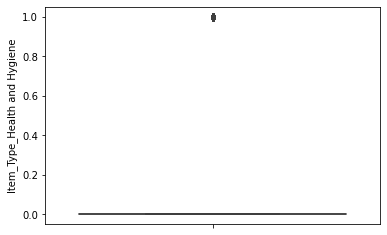

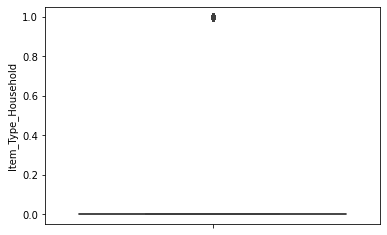

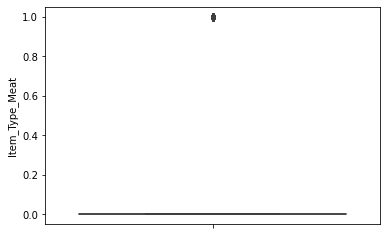

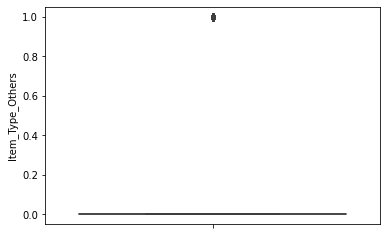

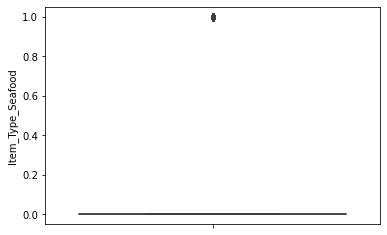

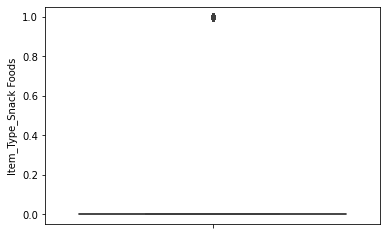

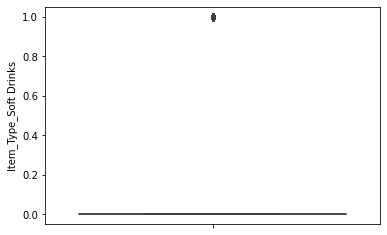

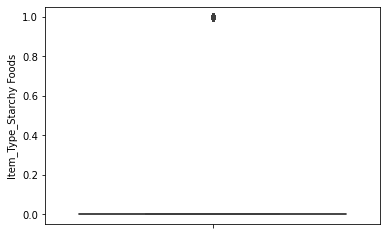

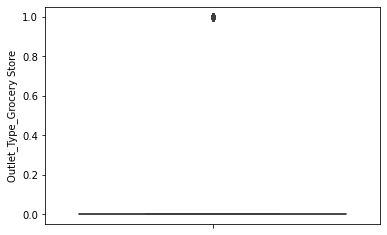

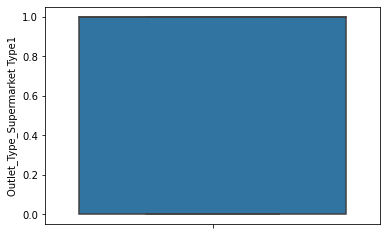

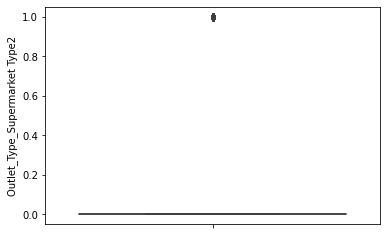

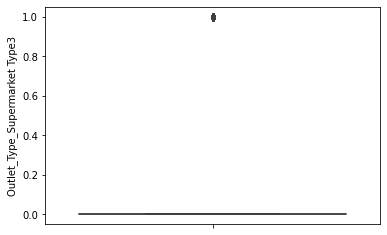

In [61]:
for i in (b) :
    sns.boxplot(y = df[i])
    plt.show()

### Item_Visibility

In [62]:
q1 = df["Item_Visibility"].quantile(0.25)
q2 = df["Item_Visibility"].quantile(0.50)
q3 = df["Item_Visibility"].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print ("Q1 :",q1)
print ("Q2 :",q2)
print ("Q3 :",q3)
print ("IQR :",iqr)
print ("Upper tail :",upper_tail)
print ("Lower tail :",lower_tail)

Q1 : 0.026989477499999998
Q2 : 0.05393093400000001
Q3 : 0.0945852925
IQR : 0.067595815
Upper tail : 0.195979015
Lower tail : -0.07440424500000001


In [63]:
df[["Item_Visibility"]].loc[df["Item_Visibility"] > upper_tail]

,Item_Visibility
49,0.255395
83,0.293418
108,0.278974
174,0.291865
334,0.204700
...,...
8292,0.209163
8345,0.266397
8371,0.214125
8432,0.227261


In [64]:
df.loc[df["Item_Visibility"] > upper_tail, "Item_Visibility"] = upper_tail

In [65]:
df.loc[df["Item_Visibility"] > upper_tail, "Item_Visibility"] 

Series([], Name: Item_Visibility, dtype: float64)

### Item_Outlet_Sales

In [66]:
q1 = df["Item_Outlet_Sales"].quantile(0.25)
q2 = df["Item_Outlet_Sales"].quantile(0.50)
q3 = df["Item_Outlet_Sales"].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print ("Q1 :",q1)
print ("Q2 :",q2)
print ("Q3 :",q3)
print ("IQR :",iqr)
print ("Upper tail :",upper_tail)
print ("Lower tail :",lower_tail)

Q1 : 834.2474
Q2 : 1794.3310000000001
Q3 : 3101.2964
IQR : 2267.049
Upper tail : 6501.8699
Lower tail : -2566.3261


In [67]:
df[["Item_Outlet_Sales"]].loc[df["Item_Outlet_Sales"] > upper_tail]

,Item_Outlet_Sales
43,6768.5228
130,7968.2944
132,6976.2524
145,7370.4060
203,6704.6060
...,...
8245,7549.5062
8329,6630.0364
8350,7240.5750
8447,7588.1226


In [68]:
df.loc[df["Item_Outlet_Sales"] > upper_tail, "Item_Outlet_Sales"] = upper_tail

In [69]:
df.loc[df["Item_Outlet_Sales"] > upper_tail, "Item_Outlet_Sales"] 

Series([], Name: Item_Outlet_Sales, dtype: float64)

### Item_Type_Baking Goods

In [70]:
q1 = df["Item_Type_Baking Goods"].quantile(0.25)
q2 = df["Item_Type_Baking Goods"].quantile(0.50)
q3 = df["Item_Type_Baking Goods"].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print ("Q1 :",q1)
print ("Q2 :",q2)
print ("Q3 :",q3)
print ("IQR :",iqr)
print ("Upper tail :",upper_tail)
print ("Lower tail :",lower_tail)

Q1 : 0.0
Q2 : 0.0
Q3 : 0.0
IQR : 0.0
Upper tail : 0.0
Lower tail : 0.0


In [71]:
df[["Item_Type_Baking Goods"]].loc[df["Item_Type_Baking Goods"] > upper_tail]

,Item_Type_Baking Goods
5,1
21,1
23,1
48,1
71,1
...,...
8435,1
8441,1
8465,1
8515,1


In [72]:
df.loc[df["Item_Type_Baking Goods"] > upper_tail, "Item_Type_Baking Goods"] = upper_tail

In [73]:
df.loc[df["Item_Type_Baking Goods"] > upper_tail, "Item_Type_Baking Goods"] 

Series([], Name: Item_Type_Baking Goods, dtype: float64)

### Rest All Columns

In [74]:
def item_type(x) :
    q1 = df[x].quantile(0.25)
    q2 = df[x].quantile(0.50)
    q3 = df[x].quantile(0.75)

    iqr = q3 - q1

    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    print ("Column Name :",x)
    print ("Q1 :",q1)
    print ("Q2 :",q2)
    print ("Q3 :",q3)
    print ("IQR :",iqr)
    print ("Upper tail :",upper_tail)
    print ("Lower tail :",lower_tail)
    print ()
    print (f"Outliers in Column {x} :\n",df[[x]].loc[df[x] > upper_tail])
    print ()
    df.loc[df[x] > upper_tail, x] = upper_tail
    print (f"Impute Outliers in Column {x} :\n",df.loc[df[x] > upper_tail, x])
    print ()
    
l1 = ['Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
    
for i in l1 :
    item_type(i)

Column Name : Item_Type_Breads
Q1 : 0.0
Q2 : 0.0
Q3 : 0.0
IQR : 0.0
Upper tail : 0.0
Lower tail : 0.0

Outliers in Column Item_Type_Breads :
       Item_Type_Breads
33                   1
114                  1
124                  1
169                  1
175                  1
...                ...
8198                 1
8240                 1
8334                 1
8370                 1
8413                 1

[251 rows x 1 columns]

Impute Outliers in Column Item_Type_Breads :
 Series([], Name: Item_Type_Breads, dtype: float64)

Column Name : Item_Type_Breakfast
Q1 : 0.0
Q2 : 0.0
Q3 : 0.0
IQR : 0.0
Upper tail : 0.0
Lower tail : 0.0

Outliers in Column Item_Type_Breakfast :
       Item_Type_Breakfast
15                      1
17                      1
87                      1
157                     1
264                     1
...                   ...
8136                    1
8222                    1
8303                    1
8317                    1
8335                    1

Outliers in Column Outlet_Type_Supermarket Type2 :
       Outlet_Type_Supermarket Type2
1                                 1
5                                 1
16                                1
31                                1
32                                1
...                             ...
8506                              1
8511                              1
8515                              1
8516                              1
8521                              1

[928 rows x 1 columns]

Impute Outliers in Column Outlet_Type_Supermarket Type2 :
 Series([], Name: Outlet_Type_Supermarket Type2, dtype: float64)

Column Name : Outlet_Type_Supermarket Type3
Q1 : 0.0
Q2 : 0.0
Q3 : 0.0
IQR : 0.0
Upper tail : 0.0
Lower tail : 0.0

Outliers in Column Outlet_Type_Supermarket Type3 :
       Outlet_Type_Supermarket Type3
7                                 1
18                                1
21                                1
36                                1
38                 

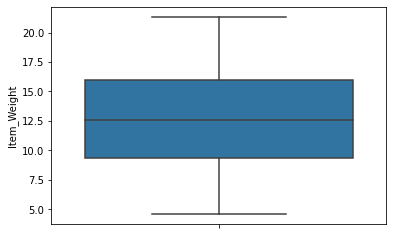

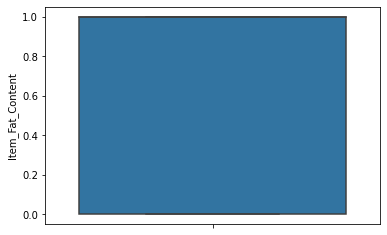

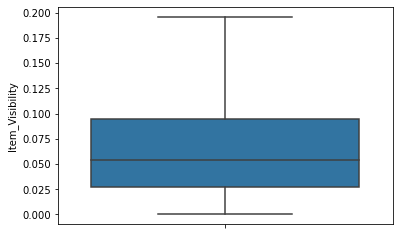

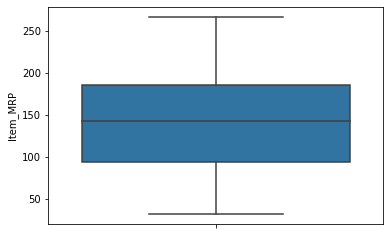

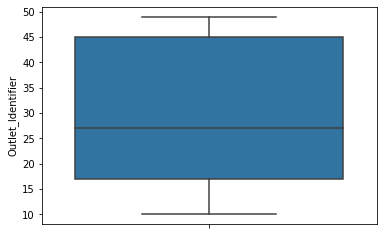

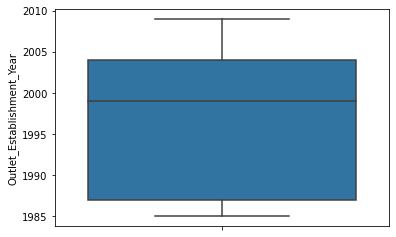

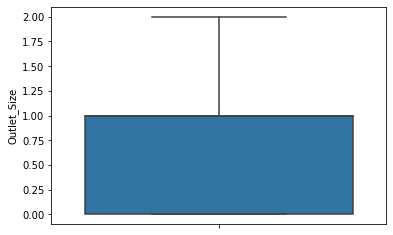

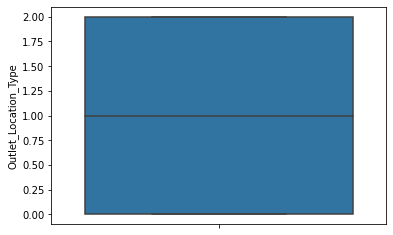

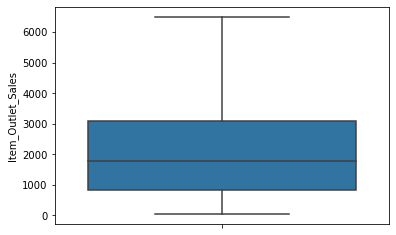

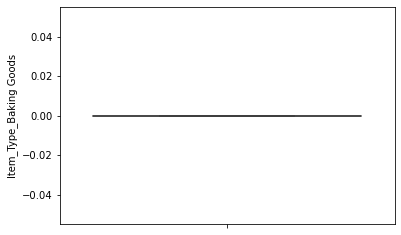

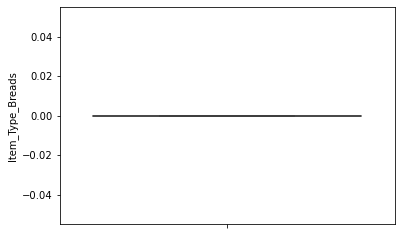

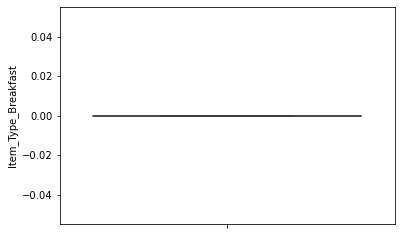

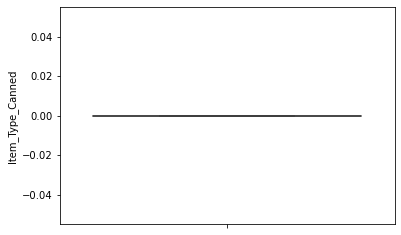

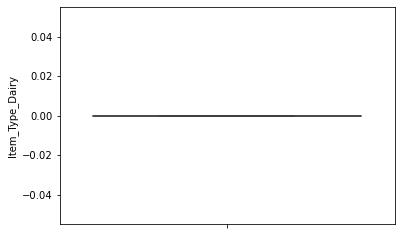

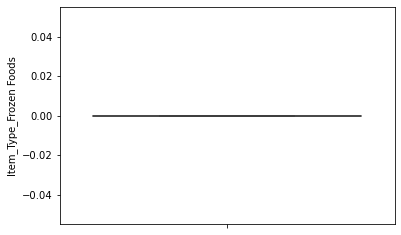

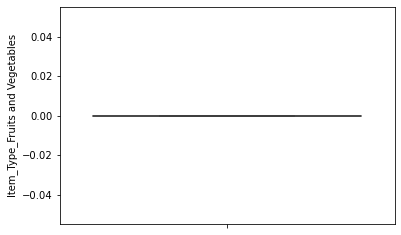

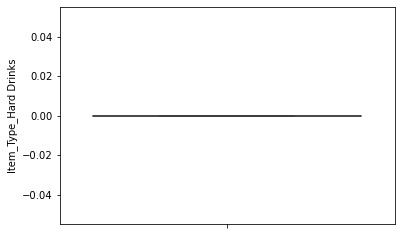

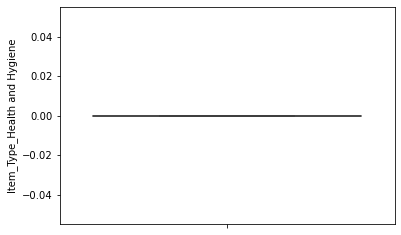

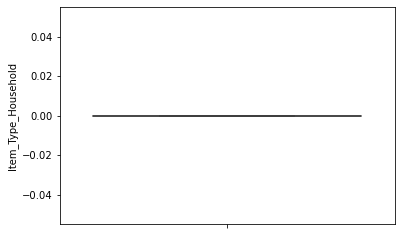

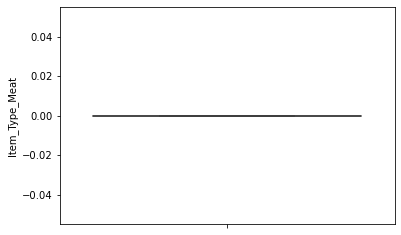

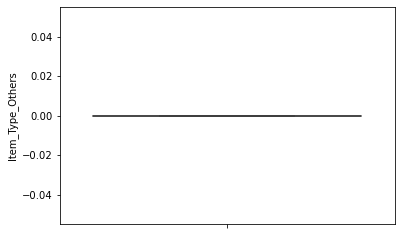

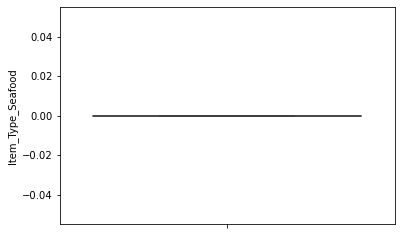

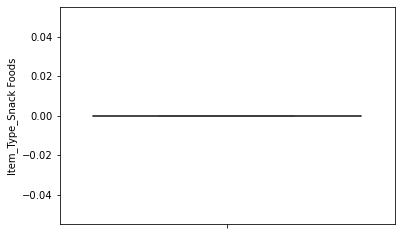

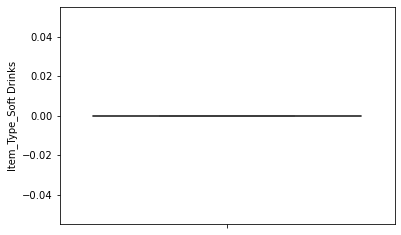

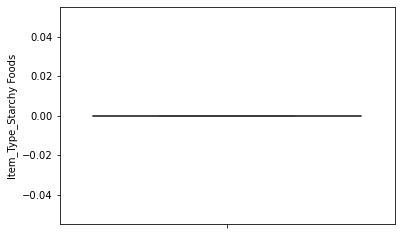

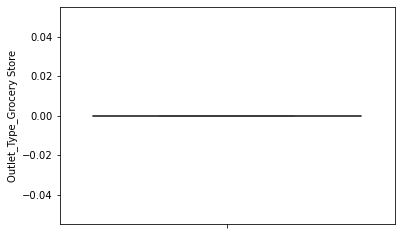

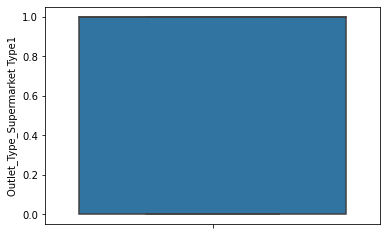

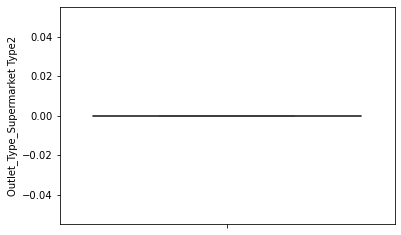

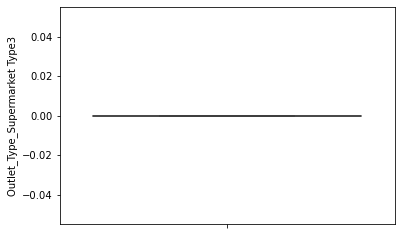

In [75]:
for i in (b) :
    sns.boxplot(y = df[i])
    plt.show()

In [76]:
# Item_Fat_Content_Values = {"reg" : 0, "Regular" : 0, "low fat" : 1, "LF" : 1 , "Low Fat" : 1}
# Outlet_Identifier_Values = {"OUT010" : 10,"OUT013" : 13, "OUT017" : 17, "OUT018" : 18, "OUT019" : 19, "OUT027" : 27, "OUT035" : 35, "OUT045" : 45, "OUT046" : 46, "OUT049" : 49}
# Outlet_Size_Values = {"Small" : 0, "Medium" : 1, "High" : 2}
# Outlet_Location_Type_Values = {"Tier 1" : 2, "Tier 2" : 1, "Tier 3" : 0}

In [77]:
columns_names = x.columns
columns_names

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [78]:
project_data = {"Item_Fat_Content":Item_Fat_Content_Values,"Outlet_Identifier":Outlet_Identifier_Values,
                "Outlet_Size":Outlet_Size_Values,"Outlet_Location_Type":Outlet_Location_Type_Values,
               "columns" : list(columns_names)}
project_data

{'Item_Fat_Content': {'reg': 0,
  'Regular': 0,
  'low fat': 1,
  'LF': 1,
  'Low Fat': 1},
 'Outlet_Identifier': {'OUT010': 10,
  'OUT013': 13,
  'OUT017': 17,
  'OUT018': 18,
  'OUT019': 19,
  'OUT027': 27,
  'OUT035': 35,
  'OUT045': 45,
  'OUT046': 46,
  'OUT049': 49},
 'Outlet_Size': {'Small': 0, 'Medium': 1, 'High': 2},
 'Outlet_Location_Type': {'Tier 1': 2, 'Tier 2': 1, 'Tier 3': 0},
 'columns': ['Item_Weight',
  'Item_Fat_Content',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Identifier',
  'Outlet_Establishment_Year',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Item_Type_Baking Goods',
  'Item_Type_Breads',
  'Item_Type_Breakfast',
  'Item_Type_Canned',
  'Item_Type_Dairy',
  'Item_Type_Frozen Foods',
  'Item_Type_Fruits and Vegetables',
  'Item_Type_Hard Drinks',
  'Item_Type_Health and Hygiene',
  'Item_Type_Household',
  'Item_Type_Meat',
  'Item_Type_Others',
  'Item_Type_Seafood',
  'Item_Type_Snack Foods',
  'Item_Type_Soft Drinks',
  'Item_Type_Starchy Foods',
  'Outl

In [79]:
with open ("Linear_Regression_Sales_Data.pkl","wb") as f:
    pickle.dump(model,f)

In [80]:
with open ("Linear_Regression_Sales_Data.json","w") as f:
    json.dump(project_data,f)